In [1]:
import evaluate

# Evaluate使用指南

## 查看支持的评估函数

In [3]:
# 在2024-01-11的测试中，list_evaluation_modules无法完全显示支持的评估函数，但不影响使用
# 完成的评估函数可以在 https://huggingface.co/evaluate-metric 中查看
evaluate.list_evaluation_modules()

['lvwerra/test',
 'jordyvl/ece',
 'angelina-wang/directional_bias_amplification',
 'cpllab/syntaxgym',
 'lvwerra/bary_score',
 'hack/test_metric',
 'yzha/ctc_eval',
 'codeparrot/apps_metric',
 'mfumanelli/geometric_mean',
 'daiyizheng/valid',
 'erntkn/dice_coefficient',
 'mgfrantz/roc_auc_macro',
 'Vlasta/pr_auc',
 'gorkaartola/metric_for_tp_fp_samples',
 'idsedykh/metric',
 'idsedykh/codebleu2',
 'idsedykh/codebleu',
 'idsedykh/megaglue',
 'cakiki/ndcg',
 'Vertaix/vendiscore',
 'GMFTBY/dailydialogevaluate',
 'GMFTBY/dailydialog_evaluate',
 'jzm-mailchimp/joshs_second_test_metric',
 'ola13/precision_at_k',
 'yulong-me/yl_metric',
 'abidlabs/mean_iou',
 'abidlabs/mean_iou2',
 'KevinSpaghetti/accuracyk',
 'NimaBoscarino/weat',
 'ronaldahmed/nwentfaithfulness',
 'Viona/infolm',
 'kyokote/my_metric2',
 'kashif/mape',
 'Ochiroo/rouge_mn',
 'giulio98/code_eval_outputs',
 'leslyarun/fbeta_score',
 'giulio98/codebleu',
 'anz2/iliauniiccocrevaluation',
 'zbeloki/m2',
 'xu1998hz/sescore',
 'dvit

## 加载评估函数

In [7]:
accuracy = evaluate.load("accuracy")

## 查看函数说明

In [8]:
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [9]:
print(accuracy.inputs_description)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

In [10]:
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

## 评估指标计算——全局计算

In [11]:
accuracy = evaluate.load("accuracy")
results = accuracy.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
results

{'accuracy': 0.5}

## 评估指标计算——迭代计算

In [4]:
accuracy = evaluate.load("accuracy")
for ref, pred in zip([0,1,0,1], [1,0,0,1]):
    accuracy.add(references=ref, predictions=pred)
accuracy.compute()

{'accuracy': 0.5}

In [5]:
accuracy = evaluate.load("accuracy")
for refs, preds in zip([[0,1],[0,1]], [[1,0],[0,1]]):
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()

{'accuracy': 0.5}

## 多个评估指标计算

In [10]:
clf_metrics = evaluate.combine(["accuracy", "f1", "recall", "precision"])
clf_metrics

In [11]:
clf_metrics

In [12]:
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'recall': 0.5,
 'precision': 1.0}

## 评估结果对比可视化

In [7]:
from evaluate.visualization import radar_plot   # 目前只支持雷达图

In [8]:
data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6}, 
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
   ]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]

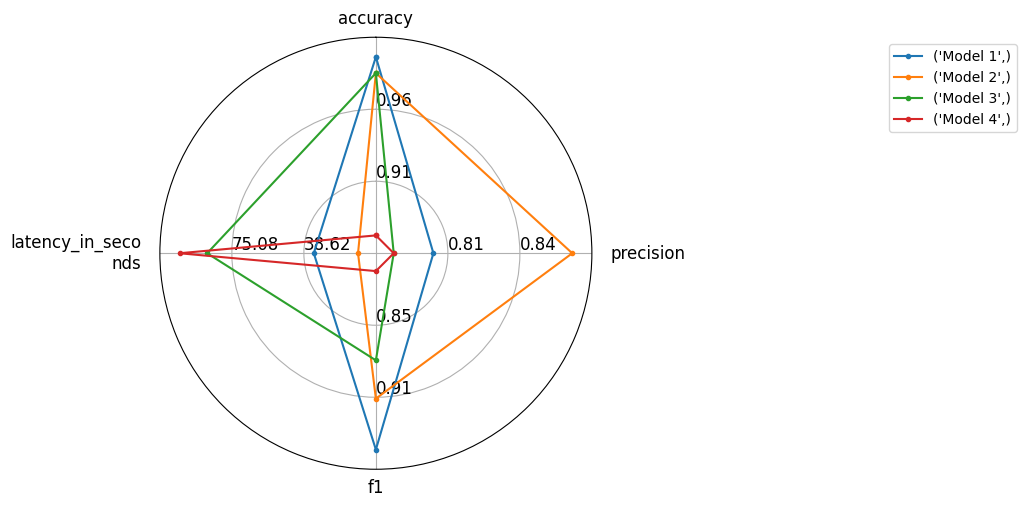

In [9]:
plot = radar_plot(data=data, model_names=model_names)